# Day 24 - LU1
<h2>Demo - Conditional Probaility</h2>

#### Q. A customer is planning to go to Seattle and wants to know which type of room has the highest chance of being available in Seattle.

Note that the event of _"Finding a room of a specific type given that it is in Seattle"_ is *__Dependent__* on the event of _"Finding a room in Seattle"_.

Let us first calculate the required probability by looking at the data.

In [1]:
import pandas as pd
df = pd.read_csv("airbnb_data.csv")
#View the number of rooms of different types in Seattle
df2 = pd.DataFrame({'count' : df.groupby( [ "city", "room_type"] ).size()}).reset_index()
#df2[(df2['room_type']=='Apartment') & (df2['city'] =='Boston')].count
df2[(df2['city']=='Seattle')]

,city,room_type,count
8,Seattle,Apartment,5028
9,Seattle,HotelRoom,51
10,Seattle,Private,1399
11,Seattle,Shared,97


In [3]:
df.head()

,id,name,room_type,price,minimum_nights,number_of_reviews,city
0,3781,HARBORSIDE-Walk to subway,Apartment,146,28,16,Boston
1,5506,**$49 Special ** Private! Minutes to center!,Apartment,145,3,107,Boston
2,6695,$99 Special!! Home Away! Condo,Apartment,169,3,115,Boston
3,10730,Bright 1bed facing Golden Dome,Apartment,85,91,32,Boston
4,10813,"Back Bay Apt-blocks to subway, Newbury St, The...",Apartment,87,28,10,Boston


In [4]:
#calculating the number of rooms in Seattle again
n_sea = df2[(df2['city']=='Seattle')]['count'].sum()
n_sea

6575

In [5]:
#probability of finding an Apartment given that it is in Seattle
p_aptINsea = round(5028/n_sea,3)
p_aptINsea

0.765

In [6]:
#probability of finding a Private room given that it is in Seattle
p_pvtINsea = round(1399/n_sea,3)
p_pvtINsea

0.213

In [7]:
#probability of finding a Hotel room given that it is in Seattle
p_htlINsea = round(51/n_sea,3)
p_htlINsea

0.008

In [8]:
#probability of finding a Shared room given that it is in Seattle
p_shdINsea = round(97/n_sea,3)
p_shdINsea

0.015

### Inference:

1. If the customer tries to book an Apartment in Seattle, then he/she has the maximum chance of getting it compared to other types of rooms.
2. There is teh least chance of getting a Hotel Room in Seattle.

#### Let's calculate the probability of _"Finding an Apartment in Seattle"_ using the formula of Conditional Probability.

**Probability of a dependent event:**
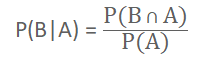


**Probability of intersection of two dependent events:**
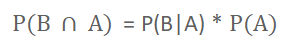

In [9]:
#probability of finding a room in Seattle - P(A)

p_sea = 0.203 # From last hands on

In [10]:
#probability that a room is an Apartment given that it is Seattle - P(B|A)
p_aptINsea

0.765

In [11]:
#probability of finding an Apartment given that it is in Seattle - P(B AND A)
p_aptINsea * p_sea

0.15529500000000002

### Inference:

1. Probability of finding an Apartment in Seattle calculated using formula for Conditional Probability is 0.155.
2. This probability matches with probability of intersection calculated directly from the data.

#### Q. A host wants to invest in real estate and then use that property for renting though _Airbnb_. The host has decided to buy an Apartment type property but hasn't decided the city yet. Can you help the host find which city has less chance of finding apartments so that the host can decide to buy in that city?

The required probability is _"Finding a room in a specific city given that it is of type Apartment"_. Let's calculate these probabilities for different cities using the formula of __Conditional Probability__.

1) Probability of finding a room in Boston given that it is an Apartment = (Probability of finding an Apartment in Boston)/(Probabiliy of finding an Apartment)

In [12]:
#probability of finding an Apartment in Boston
p_aptANDbos = 0.067

In [13]:
#probability of finding an Apartment
p_apt = 0.842
p_apt

0.842

In [14]:
#Dependent probability of finding a room in Boston given that it is an Apartment
p_bos_given_apt = round(p_aptANDbos/p_apt,3)
p_bos_given_apt

0.08

2) Probability of finding a room in Hawaii given that it is an Apartment = (Probability of finding an Apartment in Hawaii)/(Probabiliy of finding an Apartment)

In [15]:
#probability of finding an Apartment in Hawai
ss_ab = 32348
n_apt_haw = df[(df['room_type']=='Apartment') & (df['city'] =='Hawaii')].count()['id']
p_aptANDhaw = (n_apt_haw/ss_ab)

#Dependent probability of finding a room in Hawaii given that it is an Apartment
p_haw_given_apt = round(p_aptANDhaw/p_apt,3)
p_haw_given_apt

0.736

3) Probability of finding a room in Seattle given that it is an Apartment = (Probability of finding an Apartment in Seattle)/(Probabiliy of finding an Apartment)

In [16]:
#probability of finding an Apartment in Seattle
n_apt_sea = df[(df['room_type']=='Apartment') & (df['city'] =='Seattle')].count()['id']
p_aptANDsea = (n_apt_sea/ss_ab)

#Dependent probability of finding a room in Hawaii given that it is an Apartment
p_sea_given_apt = round(p_aptANDsea/p_apt,3)
p_sea_given_apt

0.185

### Inference:

1. Probability of Apartment type rooms is least in Boston. Hence the host should buy an Apartment in Boston to get more profits.